<center><h2>Phase_4 : Traffic Management System Using IOT, Data Analytics And Machine Learning</h2></center>
<br>
<h2>Team ID : 544</h2>
<p>The code starts by importing the necessary libraries.</p>
<br>
<p>Install libraries using the following commands:</p>
<ul>
    <li><code>pip install pandas</code></li>
    <li><code>pip install numpy</code></li>
    <li><code>pip install matplotlib</code></li>
    <li><code>pip install sklearn3</code></li>
    <li><code>pip install matplotlib</code></li>
    <li><code>pip install matplotlib</code></li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<hr>
<p>The code returns a pandas DataFrame with the following columns: - Year - month - Date - Festival - Vehicle count. And the Data inside the CSV file can be shown for reference.</p>

In [2]:
df = pd.read_csv('Vehicle_data.csv')
df.shape #Rows and column
df

,YEAR,MONTH,DATE,FESTIVAL,VEHICLE_COUNT
0,2021,January,1,new_year_day,500
1,2021,January,2,_,80
2,2021,January,3,sunday,180
3,2021,January,4,_,88
4,2021,January,5,_,100
...,...,...,...,...,...
88,2023,January,27,_,57
89,2023,January,28,_,67
90,2023,January,29,sunday,99
91,2023,January,30,_,100


<hr>
<p>Then use np.array to create an X array of all the dates in the dataset, which is then used to create a y array of all the vehicle counts for each date.Use plt to plot these two arrays on top of each other with different colors for each one so that it is easier to see how they change over time.The code creates a scatter plot of the vehicle count and date.</p>

In [3]:
X = np.array(df[['DATE']])
y = np.array(df[['VEHICLE_COUNT']])

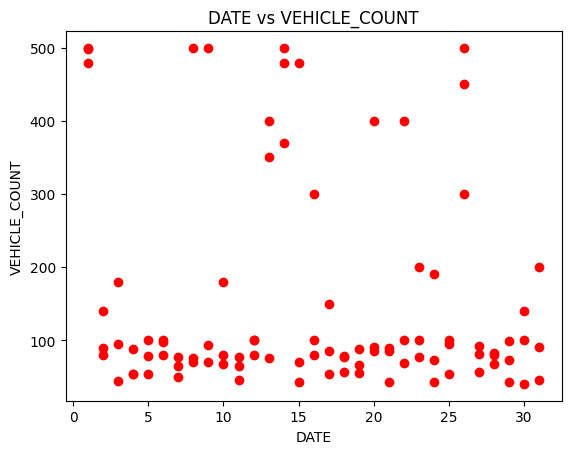

In [4]:
plt.scatter(X,y,color="red")
plt.title('DATE vs VEHICLE_COUNT')
plt.xlabel('DATE')
plt.ylabel('VEHICLE_COUNT')
plt.show()

<hr>
<p>Next, we create a linear regression model using this dataset as input (X) and output (y). Then we split our data into training and test sets using <code>train_test_split()</code>. then fit a linear regression model using <code>LinearRegression()</code> , which is used to predict how many vehicles will be counted on any given day based on past observations.</p>

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=15)
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

<hr>
<p>Use plt to plot these two arrays on top of each other with different colors for each one so that it is easier to see how they change over time.The code creates a scatter plot of the vehicle count and date.</p>

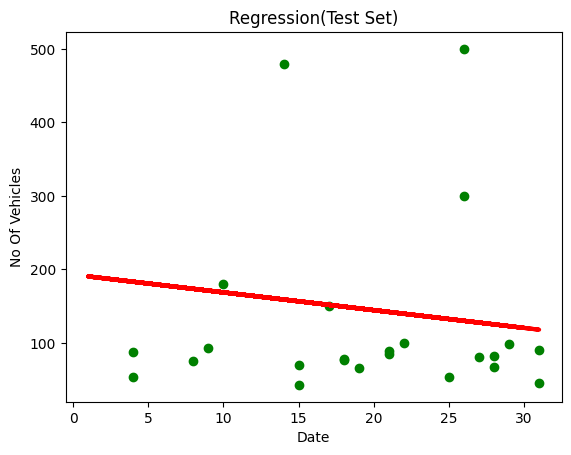

In [6]:
plt.scatter(X_test,y_test,color="green")
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=3)
plt.title('Regression(Test Set)')
plt.xlabel('Date')
plt.ylabel('No Of Vehicles')
plt.show()

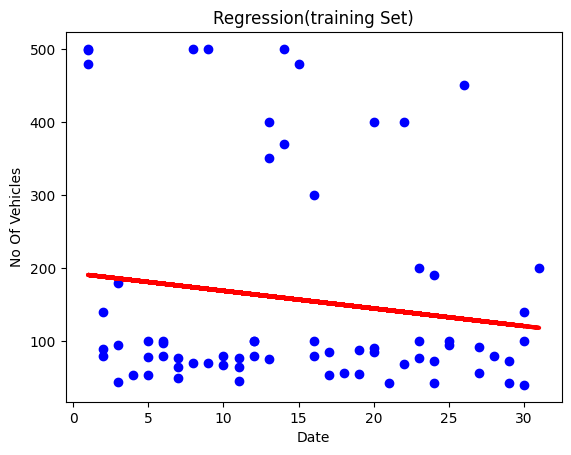

In [7]:
plt.scatter(X_train,y_train,color="blue")
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=3)
plt.title('Regression(training Set)')
plt.xlabel('Date')
plt.ylabel('No Of Vehicles')
plt.show()

<hr>
<p>Then use predict to get predictions on our test set (X_test) based on our trained model's predictions on our training set (X_train). Split the data into a training set and test set. Then trains a linear regression model on the training set, which predicts values for the test set. Set a random seed so that each time we run this script it will be different from other runs. The code will input the date of January month (2024) and return the number of vehicles that are expected to be in conjgession.</p>

In [8]:
y_pred = regressor.predict(X_test)
print('R2 score: %.2f' % r2_score(y_test,y_pred))
print('Mean squared Error :',mean_squared_error(y_test,y_pred))

R2 score: -0.07
Mean squared Error : 15650.567784936358


In [9]:
def vehicle_cnt(a):
    result = regressor.predict(np.array(a).reshape(1, -1))
    return(result[0,0])
var = int(input('Enter the date of january month (2024) : '))
print('Number of Vehicles will be : ',int(vehicle_cnt(var)))

Enter the date of january month (2024) :  31


Number of Vehicles will be :  118


<hr>
<p>Moreover, enhancing the training data would yield more precise outcomes. During festive seasons, the likelihood of congestion increases. To mitigate this issue, consider training the model with specific dates, festival names, and the total count of occurrences</p>

In [10]:
new_df = df[df['FESTIVAL']=='pongal']
new_df

,YEAR,MONTH,DATE,FESTIVAL,VEHICLE_COUNT
13,2021,January,14,pongal,480
44,2022,January,14,pongal,500
76,2023,January,15,pongal,480


In [11]:
X = np.array(new_df[['DATE']])
y = np.array(new_df[['VEHICLE_COUNT']])
X.shape
y.shape

(3, 1)

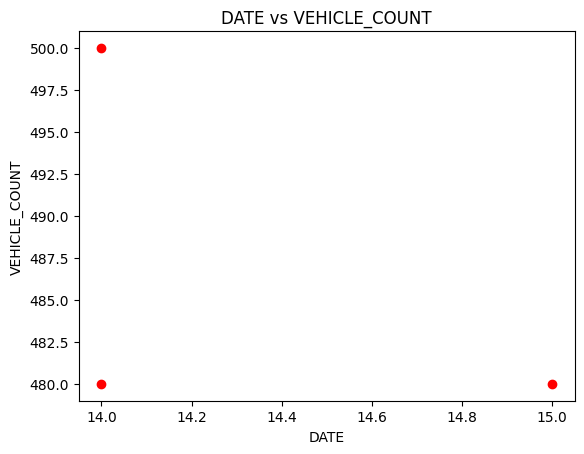

In [12]:
plt.scatter(X,y,color="red")
plt.title('DATE vs VEHICLE_COUNT')
plt.xlabel('DATE')
plt.ylabel('VEHICLE_COUNT')
plt.show()

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=15)
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

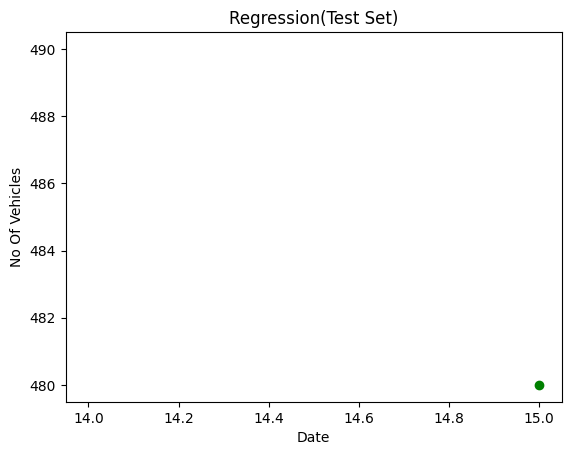

In [14]:
plt.scatter(X_test,y_test,color="green") 
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=3) 
plt.title('Regression(Test Set)')
plt.xlabel('Date')
plt.ylabel('No Of Vehicles')
plt.show()

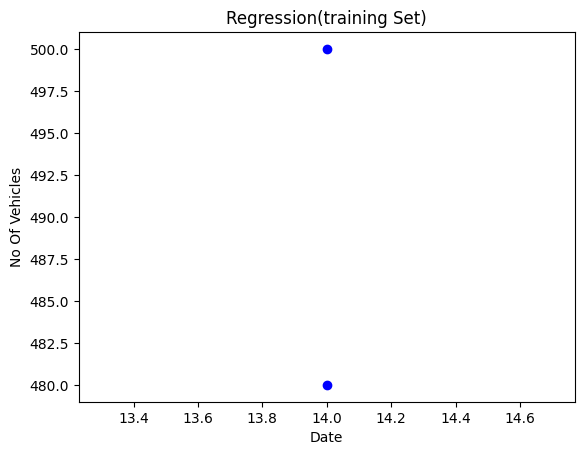

In [15]:
plt.scatter(X_train,y_train,color="blue")
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=3)
plt.title('Regression(training Set)')
plt.xlabel('Date')
plt.ylabel('No Of Vehicles')
plt.show()

<hr>
<p>We also predict y values for the test data set using the predict method on our trained model object and print them out to screen along with the R2 score (0.9) and Mean squared error value (-1).  The code will calculate the number of vehicles used during <b>Pongal 2024</b>.</p>

In [16]:
y_pred = regressor.predict(X_test)

In [17]:
def vehicle_cnt(a):
    result = regressor.predict(np.array(a).reshape(1, -1))
    return(result[0,0])
print("It is possible to travel",int(vehicle_cnt(4)), end="")
print(" Vehicles During Pongal 2024")

It is possible to travel 490 Vehicles During Pongal 2024


<hr>